In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from tabulate import tabulate
from collections import Counter

In [2]:
# Sample dataset
dataset = ["I love playing football on the weekends",
           "I enjoy hiking and camping in the mountains",
           "I like to read books and watch movies",
           "I prefer playing video games over sports",
           "I love listening to music and going to concerts"]

In [3]:
# Vectorize the dataset
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dataset)

In [4]:
# Define the number of clusters
k = 2

In [5]:
# Create a k-means model and fit it to the data
km = KMeans(n_clusters=k)
km.fit(X)

C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [6]:
# Predict the clusters for each document
y_pred = km.predict(X)

In [7]:
# Display the document and its predicted cluster in a table
table_data = [["Document", "Predicted Cluster"]]
table_data.extend([[doc, cluster] for doc, cluster in zip(dataset, y_pred)])
print(tabulate(table_data, headers="firstrow"))

Document                                           Predicted Cluster
-----------------------------------------------  -------------------
I love playing football on the weekends                            0
I enjoy hiking and camping in the mountains                        0
I like to read books and watch movies                              1
I prefer playing video games over sports                           0
I love listening to music and going to concerts                    1


In [8]:
# Print top terms per cluster
print("\nTop terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print()


Top terms per cluster:
Cluster 0:
 playing
 the
 weekends
 on
 football
 video
 sports
 prefer
 over
 games

Cluster 1:
 to
 and
 read
 watch
 movies
 like
 books
 concerts
 going
 music



In [9]:
# Calculate purity
total_samples = len(y_pred)
cluster_label_counts = [Counter(y_pred)]
purity = sum(max(cluster.values()) for cluster in cluster_label_counts) / total_samples

print("Purity:", purity)

Purity: 0.6


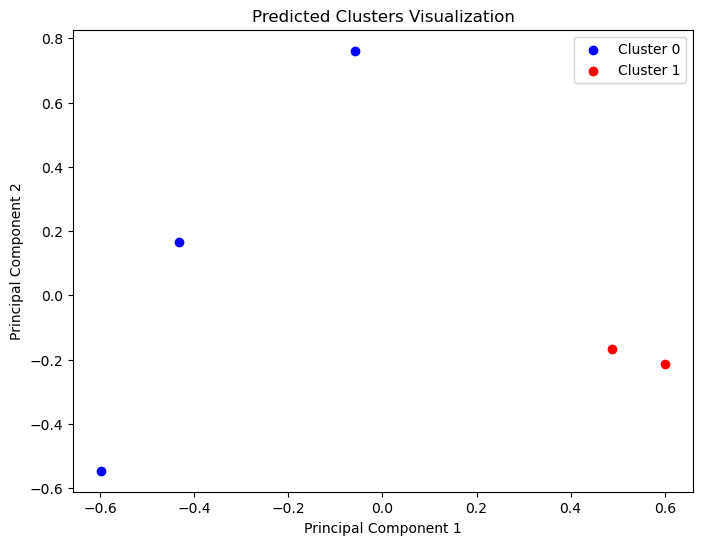

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Reduce dimensionality using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plot the predicted clusters
plt.figure(figsize=(8, 6))
colors = ['blue', 'red']
for i in range(k):
    plt.scatter(X_pca[y_pred == i, 0], X_pca[y_pred == i, 1], c=colors[i], label=f'Cluster {i}')
plt.title('Predicted Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()